In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,7
rcParams['axes.grid'] = True

# Our deep learning library is Keras
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l2
from tensorflow.python.keras import utils

# fixed random seed for reproducibility
np.random.seed(0)

C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [2]:
 spark = SparkSession.builder.appName("CSCI316-week10") \
    .config("spark-master", "local") \
    .getOrCreate()

In [3]:
myManualSchema = StructType([
    StructField("year",LongType(),True),
    StructField("c1",DoubleType(),True),
    StructField("c2",DoubleType(),True),
    StructField("c3",DoubleType(),True),
    StructField("c4",DoubleType(),True),
    StructField("c5",DoubleType(),True),
    StructField("c6",DoubleType(),True),
    StructField("c7",DoubleType(),True),
    StructField("c8",DoubleType(),True),
    StructField("c9",DoubleType(),True),
    StructField("c10",DoubleType(),True),
    StructField("c11",DoubleType(),True),
    StructField("c12",DoubleType(),True),
    StructField("c13",DoubleType(),True),
    StructField("c14",DoubleType(),True),
    StructField("c15",DoubleType(),True),
    StructField("c16",DoubleType(),True),
    StructField("c17",DoubleType(),True),
    StructField("c18",DoubleType(),True),
    StructField("c19",DoubleType(),True),
    StructField("c20",DoubleType(),True),
    StructField("c21",DoubleType(),True),
    StructField("c22",DoubleType(),True),
    StructField("c23",DoubleType(),True),
    StructField("c24",DoubleType(),True),
    StructField("c25",DoubleType(),True),
    StructField("c26",DoubleType(),True),
    StructField("c27",DoubleType(),True),
    StructField("c28",DoubleType(),True),
    StructField("c29",DoubleType(),True),
    StructField("c30",DoubleType(),True),
    StructField("c31",DoubleType(),True),
    StructField("c32",DoubleType(),True),
    StructField("c33",DoubleType(),True),
    StructField("c34",DoubleType(),True),
    StructField("c35",DoubleType(),True),
    StructField("c36",DoubleType(),True),
    StructField("c37",DoubleType(),True),
    StructField("c38",DoubleType(),True),
    StructField("c39",DoubleType(),True),
    StructField("c40",DoubleType(),True),
    StructField("c41",DoubleType(),True),
    StructField("c42",DoubleType(),True),
    StructField("c43",DoubleType(),True),
    StructField("c44",DoubleType(),True),
    StructField("c45",DoubleType(),True),
    StructField("c46",DoubleType(),True),
    StructField("c47",DoubleType(),True),
    StructField("c48",DoubleType(),True),
    StructField("c49",DoubleType(),True),
    StructField("c50",DoubleType(),True),
    StructField("c51",DoubleType(),True),
    StructField("c52",DoubleType(),True),
    StructField("c53",DoubleType(),True),
    StructField("c54",DoubleType(),True),
    StructField("c55",DoubleType(),True),
    StructField("c56",DoubleType(),True),
    StructField("c57",DoubleType(),True),
    StructField("c58",DoubleType(),True),
    StructField("c59",DoubleType(),True),
    StructField("c60",DoubleType(),True),
    StructField("c61",DoubleType(),True),
    StructField("c62",DoubleType(),True),
    StructField("c63",DoubleType(),True),
    StructField("c64",DoubleType(),True),
    StructField("c65",DoubleType(),True),
    StructField("c66",DoubleType(),True),
    StructField("c67",DoubleType(),True),
    StructField("c68",DoubleType(),True),
    StructField("c69",DoubleType(),True),
    StructField("c70",DoubleType(),True),
    StructField("c71",DoubleType(),True),
    StructField("c72",DoubleType(),True),
    StructField("c73",DoubleType(),True),
    StructField("c74",DoubleType(),True),
    StructField("c75",DoubleType(),True),
    StructField("c76",DoubleType(),True),
    StructField("c77",DoubleType(),True),
    StructField("c78",DoubleType(),True),
    StructField("c79",DoubleType(),True),
    StructField("c80",DoubleType(),True),
    StructField("c81",DoubleType(),True),
    StructField("c82",DoubleType(),True),
    StructField("c83",DoubleType(),True),
    StructField("c84",DoubleType(),True),
    StructField("c85",DoubleType(),True),
    StructField("c86",DoubleType(),True),
    StructField("c87",DoubleType(),True),
    StructField("c88",DoubleType(),True),
    StructField("c89",DoubleType(),True),
    StructField("c90",DoubleType(),True),
])

In [4]:
df = spark.read.format("csv").schema(myManualSchema).load("/Users/hp/Desktop/group/YearPredictionMSD.txt")

In [5]:
df.printSchema()

root
 |-- year: long (nullable = true)
 |-- c1: double (nullable = true)
 |-- c2: double (nullable = true)
 |-- c3: double (nullable = true)
 |-- c4: double (nullable = true)
 |-- c5: double (nullable = true)
 |-- c6: double (nullable = true)
 |-- c7: double (nullable = true)
 |-- c8: double (nullable = true)
 |-- c9: double (nullable = true)
 |-- c10: double (nullable = true)
 |-- c11: double (nullable = true)
 |-- c12: double (nullable = true)
 |-- c13: double (nullable = true)
 |-- c14: double (nullable = true)
 |-- c15: double (nullable = true)
 |-- c16: double (nullable = true)
 |-- c17: double (nullable = true)
 |-- c18: double (nullable = true)
 |-- c19: double (nullable = true)
 |-- c20: double (nullable = true)
 |-- c21: double (nullable = true)
 |-- c22: double (nullable = true)
 |-- c23: double (nullable = true)
 |-- c24: double (nullable = true)
 |-- c25: double (nullable = true)
 |-- c26: double (nullable = true)
 |-- c27: double (nullable = true)
 |-- c28: double (nullabl

In [6]:
df.show(1)

+----+--------+--------+-------+-------+---------+---------+---------+---------+-------+--------+-------+--------+--------+---------+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------+----------+--------+--------+---------+---------+-------+--------+-------+------+-------+--------+----------+---------+---------+--------+---------+--------+---------+---------+--------+---------+--------+--------+---------+--------+---------+--------+--------+-------+--------+---------+---------+--------+--------+--------+--------+-------+--------+---------+---------+---------+-------+--------+--------+-------+---------+--------+--------+-------+--------+--------+---------+--------+---------+--------+-------+---------+--------+--------+-------+---------+--------+--------+---------+-------+
|year|      c1|      c2|     c3|     c4|       c5|       c6|       c7|       c8|     c9|     c10|    c11|     c12|     c13|      c14|     c15|      c16|      c17

In [7]:
from pyspark.sql.functions import count
from pyspark.sql.functions import asc

# count number of songs for each year
df.selectExpr("year").groupBy("year").count().sort(asc("year")).show(89)

+----+-----+
|year|count|
+----+-----+
|1922|    6|
|1924|    5|
|1925|    7|
|1926|   19|
|1927|   42|
|1928|   52|
|1929|   93|
|1930|   40|
|1931|   35|
|1932|   11|
|1933|    6|
|1934|   29|
|1935|   24|
|1936|   25|
|1937|   28|
|1938|   19|
|1939|   35|
|1940|   52|
|1941|   32|
|1942|   24|
|1943|   14|
|1944|   15|
|1945|   30|
|1946|   29|
|1947|   57|
|1948|   43|
|1949|   60|
|1950|   83|
|1951|   74|
|1952|   77|
|1953|  133|
|1954|  123|
|1955|  275|
|1956|  565|
|1957|  597|
|1958|  583|
|1959|  592|
|1960|  424|
|1961|  571|
|1962|  605|
|1963|  902|
|1964|  945|
|1965| 1120|
|1966| 1377|
|1967| 1718|
|1968| 1867|
|1969| 2210|
|1970| 2349|
|1971| 2131|
|1972| 2288|
|1973| 2596|
|1974| 2184|
|1975| 2482|
|1976| 2179|
|1977| 2502|
|1978| 2926|
|1979| 3108|
|1980| 3101|
|1981| 3162|
|1982| 3597|
|1983| 3386|
|1984| 3368|
|1985| 3578|
|1986| 4219|
|1987| 5122|
|1988| 5611|
|1989| 6670|
|1990| 7256|
|1991| 8647|
|1992| 9543|
|1993|10525|
|1994|12121|
|1995|13257|
|1996|14130|

In [8]:
from pyspark.sql.functions import col 

# We notice that year 1923 is not showing so we try to show the row which year of release is 1923
df.filter(col("year") == 1923).show()

+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|year| c1| c2| c3| c4| c5| c6| c7| c8| c9|c10|c11|c12|c13|c14|c15|c16|c17|c18|c19|c20|c21|c22|c23|c24|c25|c26|c27|c28|c29|c30|c31|c32|c33|c34|c35|c36|c37|c38|c39|c40|c41|c42|c43|c44|c45|c46|c47|c48|c49|c50|c51|c52|c53|c54|c55|c56|c57|c58|c59|c60|c61|c62|c63|c64|c65|c66|c67|c68|c69|c70|c71|c72|c73|c74|c75|c76|c77|c78|c79|c80|c81|c82|c83|c84|c85|c86|c87|c88|c89|c90|
+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+

In [9]:
# count number of entries in the dtaframe
num_points = df.count()
print ('number of entries: {0}'.format(num_points))
sample_points = df.take(1)
print ('Sample of the data:', sample_points)

number of entries: 515345
Sample of the data: [Row(year=2001, c1=49.94357, c2=21.47114, c3=73.0775, c4=8.74861, c5=-17.40628, c6=-13.09905, c7=-25.01202, c8=-12.23257, c9=7.83089, c10=-2.46783, c11=3.32136, c12=-2.31521, c13=10.20556, c14=611.10913, c15=951.0896, c16=698.11428, c17=408.98485, c18=383.70912, c19=326.51512, c20=238.11327, c21=251.42414, c22=187.17351, c23=100.42652, c24=179.19498, c25=-8.41558, c26=-317.87038, c27=95.86266, c28=48.10259, c29=-95.66303, c30=-18.06215, c31=1.96984, c32=34.42438, c33=11.7267, c34=1.3679, c35=7.79444, c36=-0.36994, c37=-133.67852, c38=-83.26165, c39=-37.29765, c40=73.04667, c41=-37.36684, c42=-3.13853, c43=-24.21531, c44=-13.23066, c45=15.93809, c46=-18.60478, c47=82.15479, c48=240.5798, c49=-10.29407, c50=31.58431, c51=-25.38187, c52=-3.90772, c53=13.29258, c54=41.5506, c55=-7.26272, c56=-21.00863, c57=105.50848, c58=64.29856, c59=26.08481, c60=-44.5911, c61=-8.30657, c62=7.93706, c63=-10.7366, c64=-95.44766, c65=-82.03307, c66=-35.59194, c

In [10]:
df.describe().show()

+-------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-------------------+-------------------+------------------+------------------+--------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+--------

In [11]:
from pyspark.sql.types import *

nsongs = {}
for y in range(1922,2012):
    nsongs[y] = (df[df.year==y]).count()
    print("year =",y ," nsongs =",nsongs[y])

year = 1922  nsongs = 6
year = 1923  nsongs = 0
year = 1924  nsongs = 5
year = 1925  nsongs = 7
year = 1926  nsongs = 19
year = 1927  nsongs = 42
year = 1928  nsongs = 52
year = 1929  nsongs = 93
year = 1930  nsongs = 40
year = 1931  nsongs = 35
year = 1932  nsongs = 11
year = 1933  nsongs = 6
year = 1934  nsongs = 29
year = 1935  nsongs = 24
year = 1936  nsongs = 25
year = 1937  nsongs = 28
year = 1938  nsongs = 19
year = 1939  nsongs = 35
year = 1940  nsongs = 52
year = 1941  nsongs = 32
year = 1942  nsongs = 24
year = 1943  nsongs = 14
year = 1944  nsongs = 15
year = 1945  nsongs = 30
year = 1946  nsongs = 29
year = 1947  nsongs = 57
year = 1948  nsongs = 43
year = 1949  nsongs = 60
year = 1950  nsongs = 83
year = 1951  nsongs = 74
year = 1952  nsongs = 77
year = 1953  nsongs = 133
year = 1954  nsongs = 123
year = 1955  nsongs = 275
year = 1956  nsongs = 565
year = 1957  nsongs = 597
year = 1958  nsongs = 583
year = 1959  nsongs = 592
year = 1960  nsongs = 424
year = 1961  nsongs = 

Text(0, 0.5, 'Number of songs')

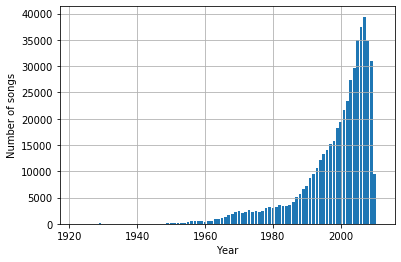

In [12]:
years = range(1922,2012)
values = [nsongs[y] for y in years]
plt.bar(years, values, align='center')
plt.xlabel("Year")
plt.ylabel("Number of songs")

In [ ]:
pandas_df = df.toPandas()